For each of the following distributions:
1. --Bernoulli--
2. -Binomial-
3. -Poisson-
4. Gaussian
5. Uniform
6. Beta

A) Read up on what the formula for the probability distribution is and what sorts of problems it is used for

B) use Python, matplotlib and the scipy.stats to plot at least 2 unique parameters(or sets of parameters) for each distribution

C) Wrte a blog post summarizing A and B above for at least 3 of the distributions, post online, and provide a link to the comments by 6pm today. 

You may use the entire internet to figure out what these distributions do. 

**Note**: Here are examples of a  sample short blog post here, just for reference:
- (http://muthu.co/poisson-distribution-with-python/)
- (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html). 

You do not have to follow these models if you don't want to.

Also, you don't have to write the formula, you can just provide your simple graphing code and a reference link to the formula (for example, from wikipedia)

#### from team
Sean: other resources for probability distributions: 
- (http://stattrek.com/probability-distributions/probability-distribution.aspx)  
- (https://www.khanacademy.org/math/ap-statistics/random-variables-ap/binomial-random-variable/v/binomial-variables)   
- (https://www.intmath.com/counting-probability/13-poisson-probability-distribution.php)
- Lingbin Jin Feb 24th at 12:37 PM 
http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

- Sean Reed Feb 24th at 1:25 PM 
- http://stattrek.com/probability-distributions/probability-distribution.aspx
- Sean Reed Feb 24th at 2:01 PM  Using scipy.stats module in Python: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
- Carolyn Chomik Feb 24th at 4:04 PM 
https://medium.com/@carolynjjankowski/3-statistical-distributions-and-examples-of-how-they-are-used-e1c7cbf2134b

- Will Hall Yesterday at 4:14 PM 
https://medium.com/@wcgopher/probability-distributions-7ac506dc2115

In [193]:
import numpy as np
from scipy.stats import bernoulli, binom, poisson, norm, uniform, beta
import matplotlib.pyplot as plt

def print_mvsk(*args):
    t = args[0]
    mean, var, skew, kurt, = float(t[0]),float(t[1]),float(t[2]),float(t[3])
    sd = np.sqrt(var)
    print(f'mean:{mean:.4f}\tvar:{var:.4f}\tskew:{skew:.4f}\nsd:{sd:.4f}\tkurt:{kurt:.4f}')

# Bernulli

Probability distribution witch takes value from 0 to 1


mean:0.1667	var:0.1389	skew:1.7889
sd:0.3727	kurt:1.2000
[0, 1] [ 0.83333333  0.16666667]


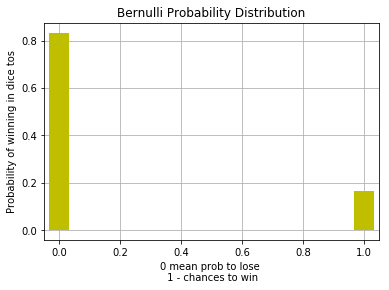

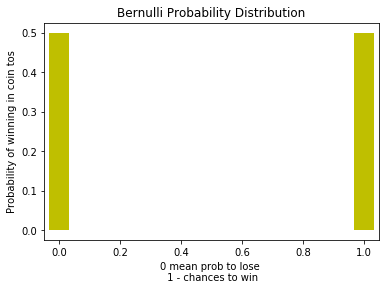

In [286]:
fig, ax = plt.subplots(1, 1)

p = 1/6
x = [0,1]

print_mvsk(bernoulli.stats(p, moments='mvsk'))
data = bernoulli.pmf(x, p)
print(x, data)
ax.vlines(x, 0, data, colors='y', lw=20)
### 

plt.ylabel('Probability of winning in dice tos')
plt.xlabel('0 mean prob to lose \n 1 - chances to win')
plt.title('Bernulli Probability Distribution')

plt.grid(True)
plt.show()

p = 1/2
x = [0,1]
fig, ax = plt.subplots(1, 1)
data = bernoulli.pmf(x, p)

ax.vlines(x, 0, data, colors='y', lw=20)
plt.ylabel('Probability of winning in coin tos')
plt.xlabel('0 mean prob to lose \n 1 - chances to win')
plt.title('Bernulli Probability Distribution')
plt.grid(False)
plt.show()


### Binomial

A binomial experiment is one that possesses the following properties:
- The events that happens with “Success” or “Failure” results during the Bernoulli trial (испытание).
- The experiment consists of \mathbit{n} repeated trials.
- The probability of a success, denoted by \mathbit{p}, remain constant from trial to trial and repeated trial are independent.

Binomial random variable – X in n trials of binomial experiment
The probability distribution of the random variable X is called a binomial distribution, and is given by the formula:


mean:33.3333	var:22.2222	skew:0.0707
sd:4.7140	kurt:-0.0150
start:13.0	end:100.0


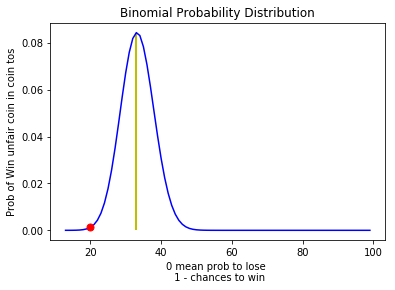

In [287]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
print_mvsk(binom.stats(n, p, moments='mvsk'))

start = binom.ppf(0.000001, n, p)
end = binom.ppf(1, n, p)



x = np.arange(start, end, step=1)
pmf_a = binom.pmf(x, n, p)
print(f'start:{start}\tend:{end}')
ax.plot(x, pmf_a, 'b-', ms=3, label='binom pmf')

plt.ylabel('Prob of Win unfair coin in coin tos')
plt.xlabel('0 mean prob to lose \n 1 - chances to win')
plt.title('Binomial Probability Distribution')

prob20 = binom.pmf([20], n, p)
ax.plot(20, prob20, 'ro', ms=7, label='binom pmf')
mean =int(binom.stats(n, p, moments='m'))
mean_y = binom.pmf([mean], n, p)
ax.vlines(mean, 0, mean_y, colors='y', lw=2)
plt.show()

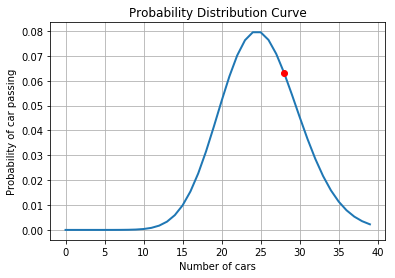

In [183]:
plt.ylabel('Probability of car passing')
plt.xlabel('Number of cars')
plt.title('Probability Distribution Curve')
arr = []
rv = poisson(25)
for num in range(0,40):
    arr.append(rv.pmf(num))

#print(rv.pmf(28))
prob = rv.pmf(28)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([28], [prob], marker='o', markersize=6, color="red")
plt.show()

### Poisson
Suppose we are counting the number of occurrences of an event in a given unit of time, distance, area or volume.

For example:
-	The number of car accidents in a day.
-	The number of dandelions in a square meter plot pf land.

Suppose:
-	Events are occurring independently
-	The probability that an event occurs in a given length of time does not change through time. Events are occurring randomly and independently.

Then X, the number of events in a fixed unit of time, has a Poisson Distribution.

mean:4.6000	var:4.6000	skew:0.4663
sd:2.1448	kurt:0.2174


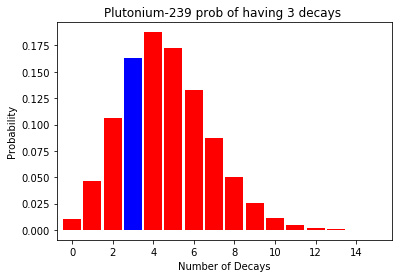

In [191]:
fig, ax = plt.subplots(1, 1)
mu = 4.6
print_mvsk(poisson.stats(mu, moments='mvsk'))
poisson.ppf(0.01, mu),
x = np.arange(poisson.ppf(0.00001, mu),
              poisson.ppf(0.99999, mu))

data = poisson.pmf(x, mu)
data2 = [0]*len(data)
data2[3]= poisson.pmf(3, mu)

ax.vlines(x, 0, data, colors='r', lw=18, alpha=1)
ax.vlines(x, 0, data2, colors='b', lw=18, alpha=1)
ax.vlines(x, 0, data2, colors='b', lw=18, alpha=1)

plt.ylabel('Probability')
plt.xlabel('Number of Decays')
plt.title('Plutonium-239 prob of having 3 decays ')
plt.show()

## Normal / Gaussian
continues distribution
"The beta distribution can be understood as representing a probability distribution of probabilities"
Very popular distribution that is used to analyze random variables.

The random independent variables has Normal distribution

mean:0.0000	var:1.0000	skew:0.0000
sd:1.0000	kurt:0.0000


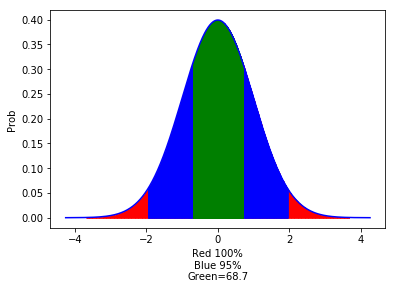

In [269]:
fig, ax = plt.subplots(1, 1)
print_mvsk(norm.stats(moments='mvsk'))
x = np.linspace(norm.ppf(0.00001),
              norm.ppf(0.99999), 1000)
data = norm.pdf(x)
ax.plot(x, data, 'b-', ms=1)

ax.vlines(x, 0, data, colors='r', lw=1, alpha=1)

# 95 % of Normal Dist
x_sigma2 = np.linspace(norm.ppf(0.025),
              norm.ppf(0.975), 1000)
sigma2 = norm.pdf(x_sigma2)
ax.vlines(x_sigma2,0, sigma2, color='b', lw=1, alpha=.5, label='asd')

p_sigma1 = norm.pdf(1)
x_sigma1 = np.linspace(norm.ppf(p_sigma1),
              norm.ppf(1-p_sigma1), 1000)
sigma1 = norm.pdf(x_sigma1)
ax.vlines(x_sigma1,0, sigma1, color='g', lw=1, alpha=.5)

plt.ylabel('Prob')
plt.xlabel('Red 100%\nBlue 95%\nGreen=68.7')
plt.show()

## Uniform

# Beta distribution

Beta distribution describes the probability of probabilities

Continues, funtion 

https://stats.stackexchange.com/questions/47916/bayesian-batting-average-prior/47921#47921

http://varianceexplained.org/statistics/beta_distribution_and_baseball/



mean:0.2700	var:0.0007	skew:0.1190
sd:0.0256	kurt:0.0014


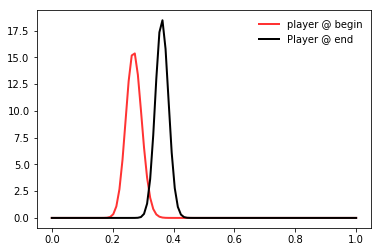

In [280]:
fig, ax = plt.subplots(1, 1)
a, b = 81, 219
print_mvsk(beta.stats(a, b, moments='mvsk'))
x = np.linspace(beta.ppf(0, a, b),
                beta.ppf(1, a, b), 100)
#print(x)
data = beta.pdf(x, a, b)
ax.plot(x, data,'r-', lw=2, alpha=.8, label='player @ begin')
rv = beta(a+100, b+100)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Player @ end')
#Check accuracy of cdf and ppf:
vals = beta.ppf([0.1, 0.5, 0.999], a, b)
np.allclose([0.1, 0.5, 0.999], beta.cdf(vals, a, b))

#Generate random numbers:
#r = beta.rvs(a, b, size=1000)
#And compare the histogram:

#ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()